In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'sms']

In [3]:
df.head(10)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
y_data = df['label'].values

In [7]:
y_data = le.fit_transform(y_data)

In [8]:
print(y_data)

[0 0 1 ... 0 0 0]


In [9]:
print(df['sms'])

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object


## Removing Stopwords & Stemming

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [11]:
sw= set(stopwords.words('english'))
ps= PorterStemmer()

In [12]:
def cleantext(sample):
    sample= sample.lower()
    sample= sample.replace("<br/ ><br/ >"," ")
    sample=re.sub("[^a-zA-Z]+"," ",sample)
    
    sample=sample.split(" ")
    sample=[ps.stem(s) for s in sample if s not in sw] 
    
    sample=" ".join(sample)
    
    return sample

In [13]:
cleantext(df['sms'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat '

In [14]:
cleantext(df['sms'][1])

'ok lar joke wif u oni '

In [15]:
cleantext(df['sms'][2])

'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli'

In [16]:
df['sms'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
df['sms'][1]

'Ok lar... Joking wif u oni...'

In [18]:
df['sms'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [19]:
df['cleanedmessage']=df['sms'].apply(cleantext)

In [20]:
corpus=df['cleanedmessage'].values

## Feature Extraction 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [22]:
cv=CountVectorizer(max_df=0.5,max_features=50000)

In [23]:
x_data=cv.fit_transform(corpus)

In [24]:
x_data.shape

(5572, 6221)

In [25]:
print(x_data[0])

  (0, 2148)	1
  (0, 2794)	1
  (0, 4046)	1
  (0, 1162)	1
  (0, 377)	1
  (0, 732)	1
  (0, 2222)	1
  (0, 6060)	1
  (0, 2898)	1
  (0, 730)	1
  (0, 957)	1
  (0, 2185)	1
  (0, 188)	1
  (0, 5886)	1


In [26]:
tfidf=TfidfTransformer()

In [27]:
x_data=tfidf.fit_transform(x_data)

In [28]:
print(x_data[0])

  (0, 6060)	0.23615475543085504
  (0, 5886)	0.19459721085856557
  (0, 4046)	0.24054119706179242
  (0, 2898)	0.2850448490727193
  (0, 2794)	0.352275555327129
  (0, 2222)	0.19459721085856557
  (0, 2185)	0.16514812015268623
  (0, 2148)	0.14084052842905104
  (0, 1162)	0.2728131680559814
  (0, 957)	0.29760381268143565
  (0, 732)	0.29760381268143565
  (0, 730)	0.3362850956787249
  (0, 377)	0.2634906267537017
  (0, 188)	0.352275555327129


In [29]:
x_data.shape

(5572, 6221)

In [30]:
y_data.shape

(5572,)

## Splitting Dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #normalize = true
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [33]:
def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

## Importing Classifiers

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

## Logistics Regression

In [35]:
clf_lr= LogisticRegression(solver='liblinear', penalty='l1')
clf_lr.fit(X_train, y_train)
pred_lr=clf_lr.predict(X_test)

In [36]:
clf_lr.score(X_test,y_test)

0.9533492822966507

In [37]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.94      0.68      0.79       219

    accuracy                           0.95      1672
   macro avg       0.95      0.84      0.88      1672
weighted avg       0.95      0.95      0.95      1672



Confusion matrix, without normalization
[[1444    9]
 [  69  150]]


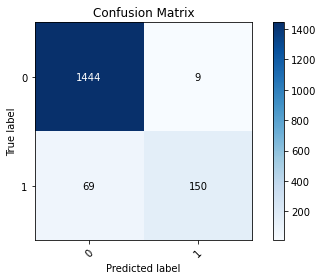

In [38]:
cnf_matrix_lr=confusion_matrix(y_test,pred_lr)
plot_confusion_matrix(cnf_matrix_lr,[0,1],normalize=False,title="Confusion Matrix")

## Multinomial Naive Bayes

In [39]:
clf_mnb=MultinomialNB(alpha = 0.3) 

clf_mnb.fit(X_train,y_train)
pred_mnb=clf_mnb.predict(X_test)
acc_mnb=clf_mnb.score(X_test,y_test)

print("Accuracy : ",acc_mnb)

Accuracy :  0.9760765550239234


In [40]:
print(classification_report(y_test,pred_mnb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1453
           1       0.95      0.86      0.90       219

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Confusion matrix, without normalization
[[1444    9]
 [  31  188]]


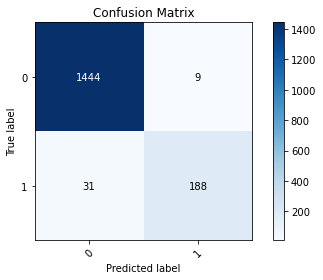

In [41]:
cnf_matrix_mnb=confusion_matrix(y_test,pred_mnb)
plot_confusion_matrix(cnf_matrix_mnb,[0,1],normalize=False,title="Confusion Matrix")

## Decision Tree

In [42]:
clf_dtc=DecisionTreeClassifier(random_state=0)

clf_dtc.fit(X_train,y_train)
pred_dtc=clf_dtc.predict(X_test)
acc_dtc=clf_dtc.score(X_test,y_test)

print("Accuracy : ",acc_dtc)

Accuracy :  0.9581339712918661


In [43]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1453
           1       0.84      0.84      0.84       219

    accuracy                           0.96      1672
   macro avg       0.91      0.91      0.91      1672
weighted avg       0.96      0.96      0.96      1672



Confusion matrix, without normalization
[[1418   35]
 [  35  184]]


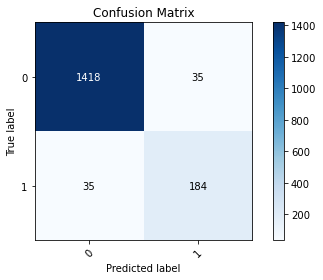

In [44]:
cnf_matrix_dtc=confusion_matrix(y_test,pred_dtc)
plot_confusion_matrix(cnf_matrix_dtc,[0,1],normalize=False,title="Confusion Matrix")

## SVM

In [45]:
clf_svm = svm.SVC(kernel='sigmoid', gamma=2.0, probability=True)

clf_svm.fit(X_train,y_train)
pred_svm=clf_svm.predict(X_test)
acc_svm=clf_svm.score(X_test,y_test)

print("Accuracy : ",acc_svm)

Accuracy :  0.9712918660287081


In [46]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1453
           1       0.94      0.83      0.88       219

    accuracy                           0.97      1672
   macro avg       0.96      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672



Confusion matrix, without normalization
[[1442   11]
 [  37  182]]


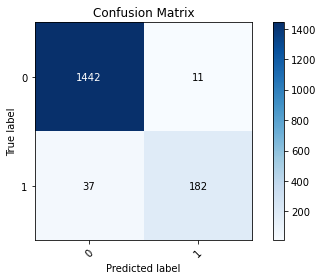

In [47]:
cnf_matrix_svm=confusion_matrix(y_test,pred_svm)
plot_confusion_matrix(cnf_matrix_svm,[0,1],normalize=False,title="Confusion Matrix")

## Random Forest

In [48]:
clf_rf= RandomForestClassifier(n_estimators=28, random_state=100) 

clf_rf.fit(X_train,y_train)
pred_rf=clf_rf.predict(X_test)
acc_rf=clf_rf.score(X_test,y_test)

print("Accuracy : ",acc_rf)

Accuracy :  0.9754784688995215


In [49]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       0.99      0.82      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



Confusion matrix, without normalization
[[1452    1]
 [  40  179]]


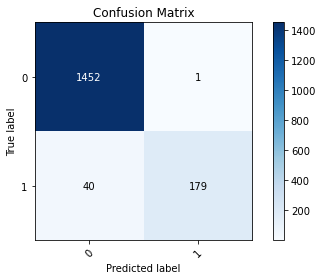

In [50]:
cnf_matrix_rf=confusion_matrix(y_test,pred_rf)
plot_confusion_matrix(cnf_matrix_rf,[0,1],normalize=False,title="Confusion Matrix")

In [51]:
classifiers=[]

classifiers.append(('LogisticRegression',clf_lr))
classifiers.append(('MNB',clf_mnb))
classifiers.append(('SVM',clf_svm))
classifiers.append(('Desicion Tree',clf_dtc))
classifiers.append(('Random Forest',clf_rf))

In [52]:
result=[]
cnf_matric_parameter=[]
for i,v in classifiers:
        
    
    pred=v.predict(X_test)
    acc=accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f_measure=f1_score(y_test,pred)
    result.append((i,acc,precision,recall,f_measure))
    
    TP,FP,TN,FN=perf_measure(y_test,pred)
    cnf_matric_parameter.append((i,TP,FP,TN,FN))

In [53]:
column_names=['Algorithm','Accuracy','Precision','Recall','F-measure']
df1=pd.DataFrame(result,columns=column_names)
print(df1)

            Algorithm  Accuracy  Precision    Recall  F-measure
0  LogisticRegression  0.953349   0.943396  0.684932   0.793651
1                 MNB  0.976077   0.954315  0.858447   0.903846
2                 SVM  0.971292   0.943005  0.831050   0.883495
3       Desicion Tree  0.958134   0.840183  0.840183   0.840183
4       Random Forest  0.975478   0.994444  0.817352   0.897243


In [54]:
column_names=['Algorithm','True_Pos','False_Pos','True_Neg','False_Neg']
df2=pd.DataFrame(cnf_matric_parameter,columns=column_names)
print(df2)

            Algorithm  True_Pos  False_Pos  True_Neg  False_Neg
0  LogisticRegression       150          9      1444         69
1                 MNB       188          9      1444         31
2                 SVM       182         11      1442         37
3       Desicion Tree       184         35      1418         35
4       Random Forest       179          1      1452         40
